In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
seqlens = np.arange(1e5,1e6,1e4)
runtimes = np.zeros(len(seqlens))
for n in range(len(seqlens)):
    slen = int(seqlens[n])
    seq = np.random.random(size=slen)
    tstart = time.time()
    sum(seq)
    tend = time.time()
    runtimes[n] = tend-tstart

Text(0,0.5,'Runtime (seconds)')

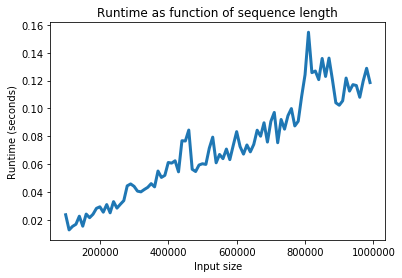

In [25]:
plt.plot(seqlens,runtimes, linewidth=3)
plt.title('Runtime as function of sequence length')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')

In [26]:
seqlens = np.arange(1e5,1e6,1e4)
ntrials=100
runtimes = np.zeros((len(seqlens),ntrials))
for n in range(len(seqlens)):
    slen = int(seqlens[n])
    seq = list(np.random.random(size=slen))
    for m in range(ntrials):
        tstart = time.time()
        len(seq)
        tend = time.time()
        runtimes[n,m] = tend-tstart

Text(0,0.5,'Runtime (seconds)')

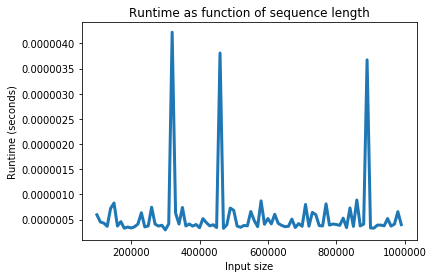

In [27]:
plt.plot(seqlens,np.mean(runtimes,axis=1), linewidth=3)
plt.title('Runtime as function of sequence length')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')

In [28]:
def argmax(t):
    if len(t)==0: # Handle a weird edge case.
        return (None,float('-inf'))
    (i,m)=(0,t[0])
    for j in range(1,len(t)):
        if t[j] > m:
            (i,m) = (j,t[j])
    return (i,m)
def naive_sort(t):
    n=len(t)
    for k in range(1,len(t)):
        # Find the largest element and its index
        (i,m) = argmax(t[:(n-k+1)])
        # Swap the maximum with the last element
        (t[i],t[n-k])=(t[n-k],m)
    return t

In [29]:
def is_sorted(t):
    '''Return True iff t is sorted
        in non-decreasing order.'''
    if len(t) <= 1:
        return True
    for i in range(1,len(t)):
        if t[i] < t[i-1]:
            return False
    return True

In [30]:
seqlens = np.arange(1e1,3*1e3,1e2)
ntrials=10
runtimes = np.zeros((len(seqlens),ntrials))
for n in range(len(seqlens)):
    slen = int(seqlens[n])
    seq = list(np.random.random(size=slen))
    for m in range(ntrials):
        tstart = time.time()
        naive_sort(seq)
        tend = time.time()
        runtimes[n,m] = tend-tstart

Text(0,0.5,'Runtime (seconds)')

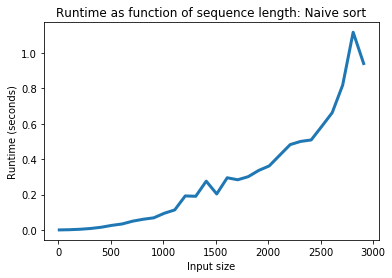

In [31]:
plt.plot(seqlens,np.mean(runtimes,axis=1), linewidth=3)
plt.title('Runtime as function of sequence length: Naive sort')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')

In [32]:
seqlens = np.arange(1e1,3*1e3,1e2)
ntrials=10
runtimes = np.zeros((len(seqlens),ntrials))
for n in range(len(seqlens)):
    slen = int(seqlens[n])
    seq = list(np.random.random(size=slen))
    for m in range(ntrials):
        tstart = time.time()
        seq.sort()
        tend = time.time()
        runtimes[n,m] = tend-tstart

Text(0,0.5,'Runtime (seconds)')

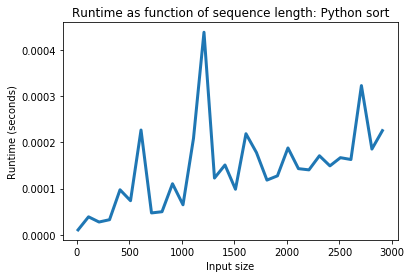

In [33]:
plt.plot(seqlens,np.mean(runtimes,axis=1), linewidth=3)
plt.title('Runtime as function of sequence length: Python sort')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')

In [34]:
def quicksort(t):
    if len(t) <= 1:
        return t
    (less,mid,more) = (list(),list(),list())
    pivot = t[0]
    mid.append(pivot)
    for i in range(1,len(t)):
        if t[i] == pivot:
            mid.append(t[i])
        elif t[i] < pivot:
            less.append(t[i])
        else: # t[i] > pivot
            more.append(t[i])
    return quicksort(less) + mid + quicksort(more)

In [35]:
seqlens = np.arange(1e1,5*1e3,1e2)
ntrials=10
runtimes = np.zeros((len(seqlens),ntrials))
for n in range(len(seqlens)):
    slen = int(seqlens[n])
    seq = list(np.random.random(size=slen))
    for m in range(ntrials):
        tstart = time.time()
        quicksort(seq)
        tend = time.time()
        runtimes[n,m] = tend-tstart

Text(0,0.5,'Runtime (seconds)')

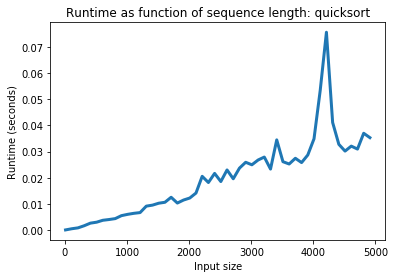

In [36]:
plt.plot(seqlens,np.mean(runtimes,axis=1), linewidth=3)
plt.title('Runtime as function of sequence length: quicksort')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')

In [37]:
seqlens = np.arange(1e1,5*1e3,1e2)
ntrials=10
myruntimes = np.zeros((len(seqlens),ntrials))
pythonruntimes = np.zeros((len(seqlens),ntrials))
for n in range(len(seqlens)):
    slen = int(seqlens[n])
    seq = list(np.random.random(size=slen))
    for m in range(ntrials):
        tstart = time.time()
        quicksort(seq)
        tend = time.time()
        myruntimes[n,m] = tend-tstart
        tstart = time.time()
        sorted(seq)
        tend = time.time()
        pythonruntimes[n,m] = tend-tstart

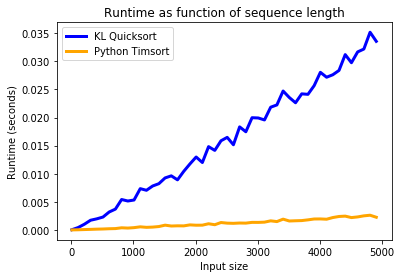

In [38]:
plt.plot(seqlens,np.mean(myruntimes,axis=1), linewidth=3, color='blue', label='KL Quicksort')
plt.plot(seqlens,np.mean(pythonruntimes,axis=1), linewidth=3, color='orange', label='Python Timsort')
plt.title('Runtime as function of sequence length')
plt.xlabel('Input size')
plt.ylabel('Runtime (seconds)')
plt.legend()

In [39]:
import time
from random import randint
listlen = 1000000
list_of_numbers = listlen*[0]
dict_of_numbers = dict()
for i in range(listlen):
    n = randint(1000000,9999999)
    list_of_numbers[i] = n
    dict_of_numbers[n] = 1

In [40]:
start_time = time.time()
8675309 in list_of_numbers
time.time() - start_time

0.03640103340148926

In [41]:
start_time = time.time()
8675309 in dict_of_numbers
time.time() - start_time

0.00010895729064941406

In [42]:
import cProfile
cProfile.run('8675309 in list_of_numbers')

         3 function calls in 0.030 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.030    0.030    0.030    0.030 <string>:1(<module>)
        1    0.000    0.000    0.030    0.030 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [43]:
cProfile.run('8675309 in dict_of_numbers')

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [44]:
exec('print("Hello, world!")')

Hello, world!


In [45]:
# This block of code is included so that you can run the
# code without having to download a separate fibonacci.py
def naive_fibo(n):
    if n < 0:
        raise ValueError('Negative Fibonacci number?')
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return naive_fibo(n-1) + naive_fibo(n-2)

known = {0:0, 1:1}
def fibo(n):
    if n in known:
        return known[n]
    else:
        f = fibo(n-1) + fibo(n-2)
        known[n] = f
        return(f)

In [46]:
def naive_fibo(n):
    if n < 0:
        raise ValueError('Negative Fibonacci number?')
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return naive_fibo(n-1) + naive_fibo(n-2)

known = {0:0, 1:1}
def fibo(n):
    if n in known:
        return known[n]
    else:
        f = fibo(n-1) + fibo(n-2)
        known[n] = f
        return(f)

In [47]:
import fibonacci
cProfile.run('fibonacci.naive_fibo(30)')

         2692540 function calls (4 primitive calls) in 1.312 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.312    1.312 <string>:1(<module>)
2692537/1    1.312    0.000    1.312    1.312 fibonacci.py:1(naive_fibo)
        1    0.000    0.000    1.312    1.312 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [48]:
cProfile.run('fibonacci.fibo(30)')

         4 function calls in 0.009 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.003    0.003    0.009    0.009 <string>:1(<module>)
        1    0.005    0.005    0.005    0.005 fibonacci.py:12(fibo)
        1    0.000    0.000    0.009    0.009 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [49]:
# This cell is here so that you don't need to download a separate
# ols_expt.py file from the website.
#
# Further, this cell uses numpy and sklearn, which you don't know about, yet.
# For now, it suffices to know that:
# 1) generate_data(n, beta) generates n data points from
#    a linear model y = \beta^T x + \epsilon where
#    \epsilon is normal(0,10),
#    and saves the results to a pair of files.
# 2) load_data loads the data from two such files.
# 3) run_experiment calls out to the methods def'd in ols_expt.py
import numpy as np
from sklearn import linear_model
def generate_data(n, beta, Xfile, Yfile):
    p = beta.size # beta is a numpy vector.
    # Each data point is drawn indep'ly with
    # independent Laplace-distributed entries
    x = np.random.laplace(0, 1, size=(n,p))
    # Observed data is beta^T x + normal noise.
    noise = np.random.normal(0, 100, size=n)
    y = np.matmul(beta,x.T) + noise
    np.savetxt(Xfile, x)
    np.savetxt(Yfile, y)
def load_data(Xfile,Yfile):
    x = np.loadtxt(Xfile)
    y = np.loadtxt(Yfile)
    return (x,y)
def run_experiment(n, beta, Xfile, Yfile):
    generate_data(n,beta,Xfile,Yfile)
    (x,y) = load_data(Xfile,Yfile)
    olsmodel = linear_model.LinearRegression()
    olsmodel.fit(x,y)

In [50]:
import cProfile
from ols_expt import *
cProfile.run('run_experiment(100000, np.array([1,2,-3,4,-5]), "x.dat", "y.dat")')

         3804974 function calls (3704972 primitive calls) in 5.810 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       24    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.000    0.000    5.810    5.810 <string>:1(<module>)
       16    0.000    0.000    0.000    0.000 <string>:12(__new__)
        6    0.000    0.000    0.000    0.000 _bootlocale.py:23(getpreferredencoding)
        3    0.000    0.000    0.000    0.000 _config.py:12(get_config)
       24    0.000    0.000    0.000    0.000 _datasource.py:164(_load)
       20    0.000    0.000    0.000    0.000 _datasource.py:197(keys)
        4    0.000    0.000    0.000    0.000 _datasource.py:216(__getitem__)
        4    0.003    0.001    0.030    0.008 _datasource.py:222(open)
        4    0.000    0.000    0.001    0.000 _datasource.py:312(__init__)
        4    0.000    0.000    0.000    0.000 _datasource.py:322(

In [51]:
import unittest
import math

In [52]:
def is_prime(n):
    if n <= 1:
        return False
    elif n==2:
        return True
    else:
        ulim = math.ceil(math.sqrt(n))
        for k in range(2,ulim):
            if n%k==0:
                return False
        return True

In [53]:
is_prime(2)

True

In [54]:
is_prime(3)

True

In [55]:
is_prime(4)

True

In [56]:
class PrimeTest(unittest.TestCase):
    def test_base(self):
        self.assertFalse(is_prime(-1))
        self.assertFalse(is_prime(0))
        self.assertFalse(is_prime(1))
        self.assertTrue(is_prime(2))
        self.assertTrue(is_prime(3))
    def test_seive(self):
        # Composite numbers are not prime
        for q in range(2,100):
            for b in range(2,100):
                self.assertFalse(is_prime(q*b))

prime_suite = unittest.defaultTestLoader.loadTestsFromTestCase(PrimeTest)
unittest.TextTestRunner().run(prime_suite)

.F
FAIL: test_seive (__main__.PrimeTest)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-56-2e2a707dd63a>", line 12, in test_seive
    self.assertFalse(is_prime(q*b))
AssertionError: True is not false

----------------------------------------------------------------------
Ran 2 tests in 0.007s

FAILED (failures=1)


<unittest.runner.TextTestResult run=2 errors=0 failures=1>

In [57]:
def is_prime(n):
    if n <= 1:
        return False
    elif n==2:
        return True
    else:
        ulim = math.ceil(math.sqrt(n))
        for k in range(2,ulim+1):
            if n%k==0:
                return False
        return True

prime_suite = unittest.defaultTestLoader.loadTestsFromTestCase(PrimeTest)
unittest.TextTestRunner().run(prime_suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.027s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [58]:
def file2upper(infile, outfile):
    '''Takes a file infile, and copies it to
    file outfile, but with all words in upper-case.'''
    if type(infile) != str:
        raise TypeError('Input file name must be a string.')
    if type(outfile) != str:
        raise TypeError('Output file name must be a string.')
    with open(infile, 'r') as infh:
        with open(outfile, 'w') as outfh:
            for line in infh:
                outfh.write(line.upper())

In [59]:
import os # We use the os module below.

In [60]:
class UpperTest(unittest.TestCase):
    '''Test that file2upper works properly.'''
    testdir='testdir' # Name of the test directory
    testtext='The Quick Brown Fox Jumps Over the Lazy Dog.'
    infile='in.txt' # We'll always process this file...
    outfile='out.txt' # and write results to this file.
    
    def setUp(self):
        '''Create a test directory and create a few
        files that we will work with in the test cases.'''
        try: 
            os.mkdir(self.testdir) # Create a test dir...
        except FileExistsError:
            pass # foo already exists as a directory.
        os.chdir(self.testdir)
    
    def tearDown(self):
        '''Delete the test directory.'''
        os.remove(self.infile)
        os.remove(self.outfile)
        os.chdir('..') # Up a level out of tesdir.
        os.rmdir(self.testdir)
        
    def test_empty(self):
        with open( self.infile, 'w') as f:
            pass # Results in an empty file.
        file2upper(self.infile, self.outfile)
        with open(self.outfile, 'r') as f:
            for line in f:
                self.assertTrue(line.isupper())
    def test_lower(self):
        with open(self.infile, 'w') as f:
            f.write(self.testtext.lower())
        file2upper(self.infile, self.outfile)
        with open(self.outfile, 'r') as f:
            for line in f:
                self.assertTrue(line.isupper())
    def test_mixed(self):
        with open(self.infile, 'w') as f:
            f.write(self.testtext)
        file2upper(self.infile, self.outfile)
        with open(self.outfile, 'r') as f:
            for line in f:
                self.assertTrue(line.isupper())
    def test_upper(self):
        with open(self.infile, 'w') as f:
            f.write(self.testtext.upper())
        file2upper(self.infile, self.outfile)
        with open(self.outfile, 'r') as f:
            for line in f:
                self.assertTrue(line.isupper())

In [61]:
upper_suite = unittest.defaultTestLoader.loadTestsFromTestCase(UpperTest)
unittest.TextTestRunner().run(upper_suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.059s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>